In [8]:
import sys
sys.path.append("/Users/marchan/Documents/GitHub/PORTFOLIO_PROJECT/LIBRARIES/ThinkDSP/code")
sys.path.append("/Users/marchan/Documents/GitHub/PORTFOLIO_PROJECT/LIBRARIES/")
sys.path.append("Users/luigibungaro/dsr/Audio_Probreat/")

In [9]:
from pyAudioAnalysis import audioFeatureExtraction as aFE, audioBasicIO, \
audioAnalysis,audioSegmentation,audioVisualization,audioTrainTest
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import numpy as np
import keras
from keras import models,layers
import os
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout, GRU
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import librosa.display
import glob2 as glob
from keras import losses
from keras import optimizers

/anaconda3/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Saving paths for every single folder

In [40]:
glob_search_path_normal = '/Users/marchan/Desktop/Robert.Krank17.10.18_18.wav'   
paths_normal = glob.glob(glob_search_path_normal)


#glob_search_path_normal = 'peterbertley_Audio/Atraining_normal/*.wav'   
#paths_normal = glob.glob(glob_search_path_normal)

#glob_search_path_murmur = 'peterbertley_Audio/Atraining_murmur/*.wav'   
#paths_murmur = glob.glob(glob_search_path_murmur)

#glob_search_path_extrahls = 'peterbertley_Audio/Atraining_extrahls/*.wav'   
#paths_extrahls = glob.glob(glob_search_path_extrahls)


In [41]:
print(len(paths_normal),len(paths_murmur),len(paths_extrahls))

1 0 0


26.88


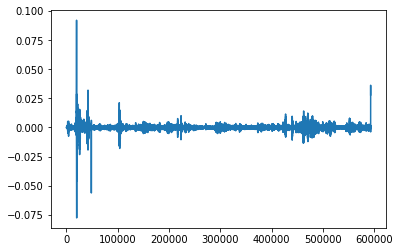

In [43]:
y, sr = librosa.load('/Users/marchan/Desktop/Robert.Krank17.10.18_18.wav')
print(librosa.core.get_duration(y))
plt.plot(y)

In [44]:
durations_normal=[]
durations_murmur=[]
durations_extrahls=[]
amplitude_normal=[]
amplitude_murmur=[]
amplitude_extrahls=[]
i=0
temp_x= []

for item in paths_normal:  #Atraining_normal   
        y, sr = librosa.load(item)
        durations_normal.append(librosa.core.get_duration(y))
        amplitude_normal.append(y)
     
for item in paths_murmur:  #Atraining_murmur
    y, sr = librosa.load(item)
    durations_murmur.append(librosa.core.get_duration(y))
    amplitude_murmur.append(y)

for item in paths_extrahls:  #Atraining_extrahls
    y, sr = librosa.load(item)
    durations_extrahls.append(librosa.core.get_duration(y))
    amplitude_extrahls.append(y)

durations_normal=np.array(durations_normal)
durations_murmur=np.array(durations_murmur)
durations_extrahls=np.array(durations_extrahls)
amplitude_normal=np.array(amplitude_normal)
amplitude_murmur=np.array(amplitude_murmur)
amplitude_extrahls=np.array(amplitude_extrahls)

In [45]:
from scipy import stats

In [46]:
stats.describe(durations_normal)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


DescribeResult(nobs=1, minmax=(26.88, 26.88), mean=26.88, variance=nan, skewness=0.0, kurtosis=-3.0)

In [47]:
print(np.sum(durations_normal),np.sum(durations_murmur),np.sum(durations_extrahls))

26.88 0.0 0.0


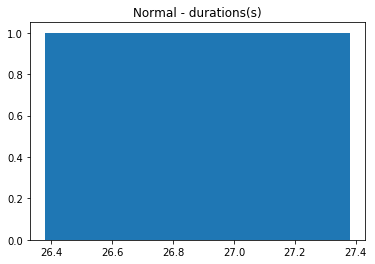

In [48]:
plt.hist(durations_normal,bins=len(durations_normal))
plt.title('Normal - durations(s)')
plt.show()

In [88]:
stats.describe(durations_murmur)

DescribeResult(nobs=34, minmax=(0.9363718820861678, 9.0), mean=7.684041616646658, variance=2.023826234113976, skewness=-3.484065659104732, kurtosis=13.47481161486224)

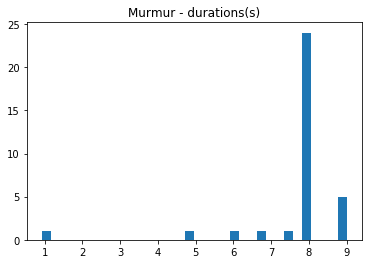

In [80]:
plt.hist(durations_murmur,bins=len(durations_murmur))
plt.title('Murmur - durations(s)')
plt.show()

In [ ]:
stats.describe(durations_extrahls)

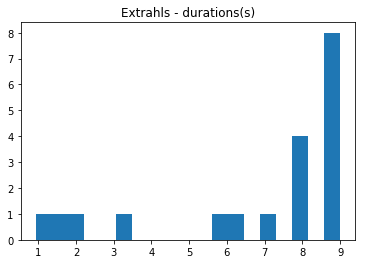

In [79]:
plt.hist(durations_extrahls,bins=len(durations_extrahls))
plt.title('Extrahls - durations(s)')
plt.show()

-4.438408e-05 -4.438408e-05 -4.438408e-05


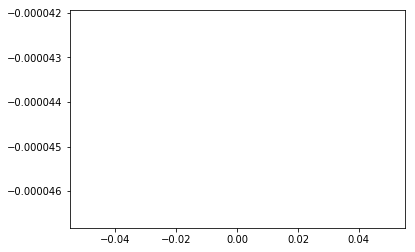

In [52]:
data=[]
for i in amplitude_normal:
    data.append(np.mean(np.array(i)))
plt.plot(data)
print(np.min(data),np.max(data),np.mean(data))

ValueError: zero-size array to reduction operation minimum which has no identity

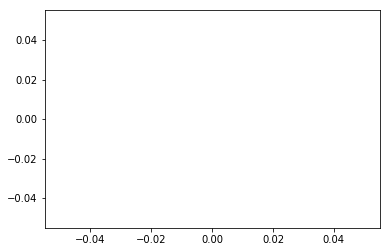

In [53]:
data=[]
for i in amplitude_murmur:
    data.append(np.mean(np.array(i)))
plt.plot(data)
print(np.min(data),np.max(data),np.mean(data))

-0.00013319642 0.00021470134 1.3603496e-06


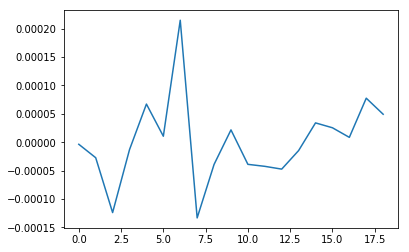

In [105]:
data=[]
for i in amplitude_extrahls:
    data.append(np.mean(np.array(i)))
plt.plot(data)
print(np.min(data),np.max(data),np.mean(data))

# Frequency Domanin

In [20]:
fmax=200
nfft=2048
hoplength=512
n_mels=64
frequencies_normal=[]
frequencies_murmur=[]
frequencies_extrahls=[]

for item in paths_normal:  #Atraining_normal   
        y, sr = librosa.load(item)
        frequencies_normal.append(librosa.feature.melspectrogram(y=y,sr=sr,n_fft=nfft,
                                                                 hop_length=hoplength,fmax=fmax,n_mels=n_mels))
        frequencies_normal.append(y)
     
for item in paths_murmur:  #Atraining_murmur
        y, sr = librosa.load(item)
        frequencies_murmur.append(librosa.feature.melspectrogram(y=y,sr=sr,n_fft=nfft,
                                                                 hop_length=hoplength,fmax=fmax,n_mels=n_mels))
        frequencies_murmur.append(y)
        
for item in paths_extrahls:  #Atraining_extrahls
    y, sr = librosa.load(item)
    frequencies_extrahls.append(librosa.feature.melspectrogram(y=y,sr=sr,n_fft=nfft,
                                                             hop_length=hoplength,fmax=fmax,n_mels=n_mels))
    frequencies_extrahls.append(y)
    
frequencies_normal=np.array(frequencies_normal)
frequencies_murmur=np.array(frequencies_murmur)
frequencies_extrahls=np.array(frequencies_extrahls)

ValueError: zero-size array to reduction operation minimum which has no identity

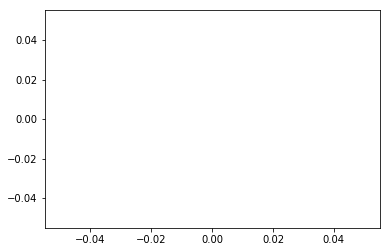

In [21]:
data=[]
for i in frequencies_normal:
    data.append(np.mean(np.array(i)))
plt.plot(data)
print(np.min(data),np.max(data),np.mean(data))

In [117]:
len(frequencies_normal)

62

In [125]:
len(frequencies_normal[0])

64

In [171]:
def melsp_librosa(fmax=200, nfft=2048, hoplength=512, n_mels=64):
    target=[]
    i=0
    temp_x= []
    temp_y = []
    
    for item in paths_normal:  #Atraining_normal   
            y, sr = librosa.load(item)
            x = librosa.feature.melspectrogram(y=y,sr=sr,n_fft=nfft,hop_length=hoplength,fmax=fmax,n_mels=n_mels)
            #print(item, x.shape)
            temp_x.append(x.transpose())
            temp_y.append([1., 0., 0.])
            #temp_x = np.concatenate((x.reshape(np.prod(x.shape))))
            #target.append('0')
    
    for item in paths_murmur:  #Atraining_murmur
        y, sr = librosa.load(item)
        x = librosa.feature.melspectrogram(y=y,sr=sr,n_fft=nfft,hop_length=hoplength,fmax=fmax,n_mels=n_mels)
        temp_x = np.concatenate(x.T)
        target.append('1')

    for item in paths_extrahls:  #Atraining_extrahls
        y, sr = librosa.load(item)
        x = librosa.feature.melspectrogram(y=y,sr=sr,n_fft=nfft,hop_length=hoplength,fmax=fmax,n_mels=n_mels)
        temp_x = np.concatenate(x.T)
        target.append('2')
    
    target = np.array(target)
    target = to_categorical(target)
    
    X_train,X_test,y_train,y_test = train_test_split(temp_x,target,test_size=0.4)
    #print('number of sample is',len(X_train),'sample shape is',X_train[0].shape)
    #X_train=np.array(X_train)
    #X_test=np.array(X_test)
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = melsp_librosa()

/Users/luigibungaro/dsr/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


ValueError: Found input variables with inconsistent numbers of samples: [24832, 53]

In [ ]:
X_train.shape

In [24]:
model = models.Sequential()
model.add(layers.Dense(4000, activation='relu',input_shape=(None,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2000, activation='relu'))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
#model.add(layers.Flatten())
model.add(layers.Dense(3,activation='softmax'))
model.summary()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [22]:
sgd = optimizers.rmsprop(lr=00.1)#, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [23]:
history = model.fit(
    np.array(X_train),y_train,
    epochs=20,
    batch_size=1)

ValueError: Error when checking input: expected dense_8_input to have 3 dimensions, but got array with shape (50, 1)

/anaconda3/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


592704 128


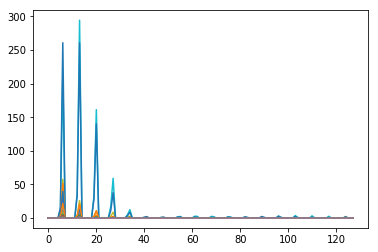

(128, 1158)


In [54]:
print(len(y),len(librosa.feature.melspectrogram(y=y,sr=sr,n_fft=2048,hop_length=512,fmax=200)))
plt.plot(librosa.feature.melspectrogram(y=y,sr=sr,n_fft=2048,hop_length=512,fmax=200))
plt.show()
plt.close()
print(librosa.feature.melspectrogram(y=y,sr=sr,n_fft=2048,hop_length=512,fmax=200).shape)

(1, 1158)


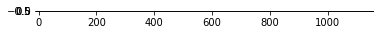

(16, 290)


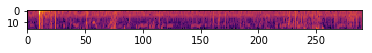

(16, 4631)


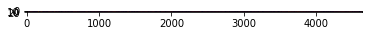

(128, 1158)


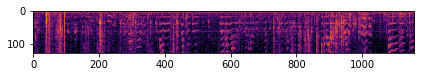

In [55]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 4))

mel = librosa.feature.melspectrogram(y=y,sr=sr,n_fft=2048,hop_length=512, n_mels=1, fmax=200)
print(mel.shape)
mel = librosa.power_to_db(mel)
plt.imshow(mel, cmap="inferno")
plt.show()
plt.close()

mel = librosa.feature.melspectrogram(y=y,sr=sr,n_fft=2048,hop_length=2048, n_mels=16, fmax=200)
print(mel.shape)
mel = librosa.power_to_db(mel)
plt.imshow(mel, cmap="inferno")
plt.show()
plt.close()

mel = librosa.feature.melspectrogram(y=y,sr=sr,n_fft=2048,hop_length=128, n_mels=16, fmax=200)
print(mel.shape)
mel = librosa.power_to_db(mel)
plt.imshow(mel, cmap="inferno")
plt.show()
plt.close()

mel = librosa.feature.melspectrogram(y=y,sr=sr,n_fft=2048,hop_length=512, n_mels=128, fmax=1000)
print(mel.shape)
mel = librosa.power_to_db(mel)
plt.imshow(mel, cmap="inferno")

#librosa.display.specshow(
#        librosa.power_to_db(mel),
#                          y_axis='mel', fmax=10,
#                         x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Mel spectrogram')
plt.tight_layout()

In [56]:
t = librosa.feature.melspectrogram(y=y,sr=sr,n_fft=2048,hop_length=512,fmax=100)

/anaconda3/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [55]:
t.reshape(np.prod(t.shape))

(49024,)

In [14]:
x = np.array([[1,2,3]])
y = np.array([[4,5,6]])

In [5]:
 z, sr = librosa.load('peterbertley_Audio/Atraining_murmur/201101051104.wav')

In [6]:
type(z)

numpy.ndarray

In [16]:
e = np.concatenate((x,y))

In [18]:
data = np.array([])

In [21]:
np.concatenate((x))

array([1, 2, 3])